In [721]:
# 导入依赖
import numpy as np
import matplotlib.pyplot as plt

In [722]:
# 渲染图设定
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [723]:
f = open('Iris_training.txt','r')
data = f.read().split('\n')
# traning_data = np.sp
# print(data)
traning_data = []
for item in data:
    sub_str = item.split(',')
    # print(sub_str,end='\n\n')
    for _str in sub_str:
        value = float(_str)
        traning_data.append(value)

# print(traning_data)
f.close()

In [724]:

f = open('Iris_test.txt' ,'r')

data = f.read().split('\n')
# traning_data = np.sp
# print(data)
test_data = []
for item in data:
    sub_str = item.split(',')
    # print(sub_str,end='\n\n')
    for _str in sub_str:
        value = float(_str)
        test_data.append(value)

test_data = np.reshape(test_data,(10,3))
# print(test_data)


In [725]:

data_input = traning_data
data_input = np.reshape(data_input,(140,3)).astype(float)

# print(data_input)


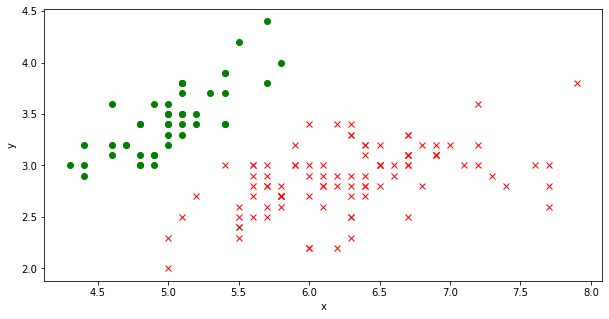

In [726]:
pass_point = []
fail_point = []
for data in data_input:
    if data[2] == 1:
        pass_point.append(data[0])
        pass_point.append(data[1])
        plt.plot(data[0],data[1] ,'go')
    else :
        fail_point.append(data[0])
        fail_point.append(data[1])
        plt.plot(data[0],data[1] ,'rx')


pass_point = np.reshape(pass_point,(len(pass_point)//2,2))
# print(pass_point,end='\n\n')
fail_point = np.reshape(fail_point,(len(fail_point)//2,2))
# print(fail_point, end='\n\n')
plt.ylabel('y') 
plt.xlabel('x') 
plt.show()

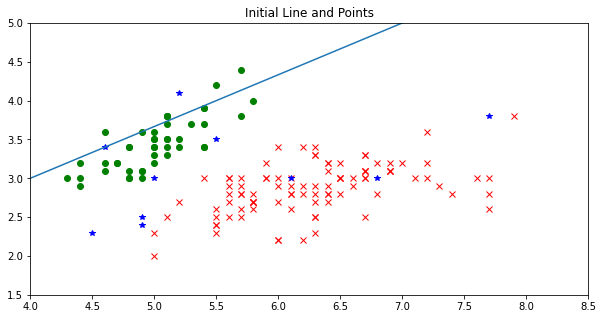

In [727]:
# 初始参数
w_1 = 2.0
w_2 = -3.0
b = 1.0
line_x = np.arange(-100,100, 1.0)
# print(line_x)
# x * w_1 + y * w_2 + b = 0
line_y = - ((line_x * w_1 + b) / w_2)

plt.plot(pass_point[:,0],pass_point[:,1] ,'go')
plt.plot(fail_point[:,0],fail_point[:,1] ,'rx')
plt.plot(test_data[:,0],test_data[:,1] ,'b*')

range_x_left, range_y_left = 4,1.5
range_x_right, range_y_right = 8.5,5
plt.title("Initial Line and Points")
plt.xlim([range_x_left, range_x_right]) 
plt.ylim([range_y_left, range_y_right]) 
plt.plot(line_x,line_y)
plt.show()


In [728]:
points = data_input[:,:2] # 取出 data 中的每一个点
true_class = data_input[:,2] # 取出 data 中真实的 class

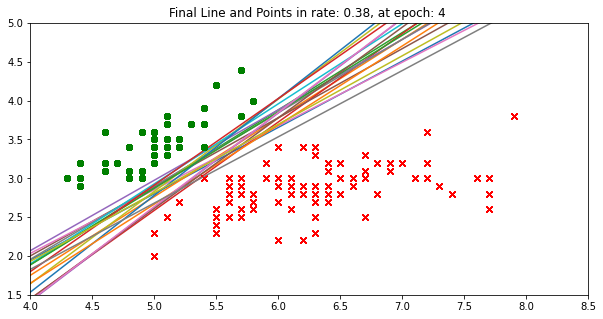

In [729]:
base_rate = 0.02 # 学习速率
epoch_start = 1
max_epoch = 40 # 设置最大世代
itteration_time = 20

# 用于取 w_1 的平均值
w1_sum = 0.0 
w2_sum = 0.0
b_sum = 0.0
final_w_1 = 0.0 # 最终 w_1 解
final_w_2 = 0.0 # 最终 w_2 解
b = 0.0 # 最终 b 解

for x in range(1, itteration_time):
    w = np.reshape([w_1,w_2],(2,1)) # 初始化 vector
    rate = base_rate * x
    for epoch in range(epoch_start,max_epoch):
        finished = True
        for index in range(len(points)) : # 遍历每一个点，将 guess_class 和 true_class 比较
            ans = np.linalg.multi_dot([points[index],w]) + b
            # print('point: ', points[index] ,'\nw: \n', w ,'\nb: ', b  ,'\nans:', ans[0], '\n\n')
            check = (ans[0] * true_class[index] >= 0.0) # 检查猜的 class 是否正确（是否同号）
            if check == False:
                finished = False # 如果有错误代表还没完成
                step = true_class[index] * rate 
                # 更新 w 和 b
                change = np.multiply(points[index], step)
                w += np.reshape(np.multiply( points[index], step),(2,1))
                b = b + step 
        if finished == True: 
            break
    final_w_1 = w[0,0]
    final_w_2 = w[1,0]
    w1_sum += w[0,0]
    w2_sum += w[1,0]
    b_sum += b
    # test_points = np.reshape([2,-4,-5,1,-2,-2],(3,2)).astype(float)
    test_points = test_data

    plt.plot(pass_point[:,0],pass_point[:,1] ,'go')
    plt.plot(fail_point[:,0],fail_point[:,1] ,'rx')
    plt.title("Final Line and Points in rate: %s, at epoch: %s " %(rate,epoch))
    plt.xlim([range_x_left, range_x_right]) 
    plt.ylim([range_y_left, range_y_right]) 
    line_y = - ((line_x * final_w_1 + b) / final_w_2)
    plt.plot(line_x,line_y)
    
plt.show() 

In [730]:
w_1_average = w1_sum / itteration_time
w_2_average = w2_sum / itteration_time
b_average = b_sum / itteration_time
print('w_1_average: ',w_1_average)
print('w_2_average: ',w_2_average)
print('b_average: ',b_average)


w_1_average:  -1.8759000000000008
w_2_average:  1.873300000000001
b_average:  4.170000000000002


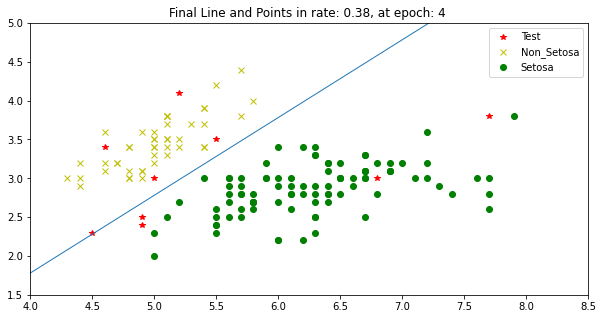

In [731]:
# 采用平均值方案
w = np.reshape([w_1_average,w_2_average],(2,1)) # 初始化 vector
b = b_average
final_w_1 = w[0,0]
final_w_2 = w[1,0]


# test_points = np.reshape([2,-4,-5,1,-2,-2],(3,2)).astype(float)
test_points = test_data

plt.plot(test_points[:,0], test_points[:,1] ,'r*', label='Test')
plt.plot(pass_point[:,0],pass_point[:,1] ,'yx', label='Non_Setosa')
plt.plot(fail_point[:,0],fail_point[:,1] ,'go', label='Setosa')
# range_x, range_y = 10,10
plt.title("Final Line and Points in rate: %s, at epoch: %s " %(rate,epoch))
plt.xlim([range_x_left, range_x_right]) 
plt.ylim([range_y_left, range_y_right]) 
line_y = - ((line_x * final_w_1 + b) / final_w_2)
plt.plot(line_x,line_y ,linewidth=1)
plt.legend()
plt.show()

In [732]:

false_count = 0
for index in range(len(test_points)) : # 遍历每一个点，将 guess_class 和 true_class 比较
    ans = np.linalg.multi_dot([test_points[index, :2],w]) + b
    check = (ans[0] * test_points[index,2] >= 0.0) # 检查猜的 class 是否正确（是否同号）
    # print('point: ', test_points[index] ,'\nw: \n', w ,'\nb: ', b  ,'\nans:', ans[0] ,'\ncheck:', check, '\n\n')
    if check == False:
        false_count +=1

print('正确率: ',np.round(((len(test_data) - false_count) / len(test_data)) * 100.0,4),'%' )


正确率:  100.0 %
